Решение задач при помощи NumPy, SciPy, Matplotlib</h1>

In [ ]:
# подключение модулей NumPy и Matplotlib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Пример 0. Найти уравнение параболы по трем точкам

In [ ]:
# подключение NumPy Random для генерации псевдослучайных чисел

import numpy.random as npr

In [ ]:
# сгенерировать массив из 3 точек на плоскости
# y =ax2+bx+c

pts = npr.rand(3, 2)*100
pts

array([[57.6758703 , 15.03358538],
       [54.29885824, 72.05357803],
       [68.21470228, 62.56794239]])

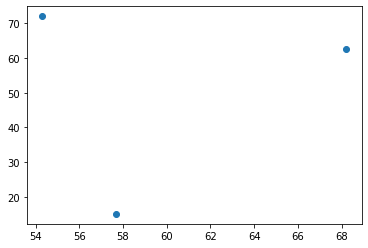

In [ ]:
# отрисовать точки

plt.scatter(pts[:,0], pts[:,1])
#plt.plot(x, y)

In [ ]:
# подставив координаты трех точек в уравнение параболы a*x^2 + b*x + c = y
# составить систему трех уравнений (СЛАУ) относительно a, b, c

# [[x0^2, x0, 1],   [[a],   [[y0],
#  [x1^2, x1, 1], *  [b], =  [y1],
#  [x2^2, x2, 1]]    [c]]    [y2]]

# A * X = Y

In [ ]:
pts[:,0]

array([57.6758703 , 54.29885824, 68.21470228])

In [ ]:
# матрица СЛАУ

A = np.vstack((pts[:,0]**2, pts[:,0], [1]*3)).T
A

array([[3.32650602e+03, 5.76758703e+01, 1.00000000e+00],
       [2.94836601e+03, 5.42988582e+01, 1.00000000e+00],
       [4.65324561e+03, 6.82147023e+01, 1.00000000e+00]])

In [ ]:
# решить СЛАУ и получить коэффициенты a,b,c
#solve (A, Y) = X (если мы решаем систему AX=Y)
a,b,c = np.linalg.solve(A, pts[:,1])
a,b,c

(1.5374667417127241, -189.04216755188753, 5803.812758401853)

In [ ]:
[i for i in range(0, 1, 100)]
#np.arange()

[0]

In [ ]:
# сгенерировать набор промежуточных значений между минимальной и максимальной координатой по оси x
# range()
x = np.linspace(pts[:,0].min(), pts[:,0].max(), 100) # np.array()
x.shape

#list(), len(list)

(100,)

In [ ]:
x

array([54.29885824, 54.43942232, 54.5799864 , 54.72055048, 54.86111456,
       55.00167864, 55.14224273, 55.28280681, 55.42337089, 55.56393497,
       55.70449905, 55.84506313, 55.98562721, 56.12619129, 56.26675537,
       56.40731946, 56.54788354, 56.68844762, 56.8290117 , 56.96957578,
       57.11013986, 57.25070394, 57.39126802, 57.53183211, 57.67239619,
       57.81296027, 57.95352435, 58.09408843, 58.23465251, 58.37521659,
       58.51578067, 58.65634475, 58.79690884, 58.93747292, 59.078037  ,
       59.21860108, 59.35916516, 59.49972924, 59.64029332, 59.7808574 ,
       59.92142149, 60.06198557, 60.20254965, 60.34311373, 60.48367781,
       60.62424189, 60.76480597, 60.90537005, 61.04593413, 61.18649822,
       61.3270623 , 61.46762638, 61.60819046, 61.74875454, 61.88931862,
       62.0298827 , 62.17044678, 62.31101087, 62.45157495, 62.59213903,
       62.73270311, 62.87326719, 63.01383127, 63.15439535, 63.29495943,
       63.43552351, 63.5760876 , 63.71665168, 63.85721576, 63.99

In [ ]:
# рассчитать координаты по оси y для полученной параболы

y = a * x**2 + b*x + c

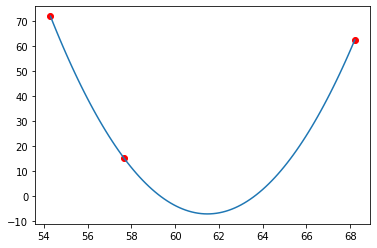

In [ ]:
# отрисовать исходные точки и параболу
# проверить, что парабола проходит через точки

# random seed = 228

plt.scatter(pts[:,0], pts[:,1], color='red')
plt.plot(x, y)

In [ ]:
# те же коэффициенты a,b,c можно получить при помощи polyfit

np.polyfit(pts[:,0], pts[:,1], 2) 

array([ 1.53746674e+00, -1.89042168e+02,  5.80381276e+03])

In [ ]:
a, b, c

(1.5374667417127241, -189.04216755188753, 5803.812758401853)

In [ ]:
np.polyfit(pts[:,0], pts[:,1], 2) - np.array([a,b,c])

array([ 1.95399252e-14, -2.67164069e-12,  8.27640179e-11])

## Пример 1. Найти уравнение окружности по трем точкам

In [ ]:
# идея метода следующая:
# построить два отрезка, соединяющие точки 0-1 и 1-2
# в центрах этих отрезков восстановить перпендикуляры,
# которые пересекутся в центре окружности

In [ ]:
# рассчитать коэффициенты k,b прямых y=k*x+b, проходящих через точки 0-1 и 1-2 

k1, b1 = np.polyfit(pts[:2,0], pts[:2,1], 1)
k2, b2 = np.polyfit(pts[1:,0], pts[1:,1], 1)

In [ ]:
# рассчитать центры отрезков 0-1 и 1-2

c1 = np.mean(pts[:2], axis=0)
c2 = np.mean(pts[1:], axis=0)

In [ ]:
# рассчитать коэффициенты k,b для перпендикуляров, проходящих через центры отрезков
# k_ = -1/k, где k_ - коэфф. при x для линии, перпендикулярной той, у которой коэфф. при x равен k

k_1 = -1/k1
k_2 = -1/k2
b_1 = c1[1] - k_1*c1[0]
b_2 = c2[1] - k_2*c2[0]
b_1, b_2

(88.2413788985337, -12.462466273024141)

(14.298299005450676, 46.64448685263392, 5.243341549557911, 64.86336961752713)

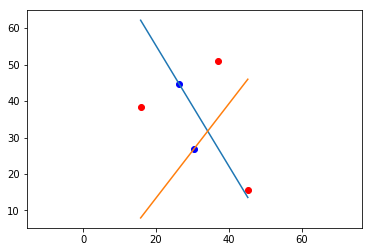

In [ ]:
# отрисовать точки, центры отрезков и перпендикуляры

plt.scatter(pts[:,0], pts[:,1], color='r')
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color='b')
plt.plot(x, k_1*x+b_1)
plt.plot(x, k_2*x+b_2)
plt.axis('equal')

In [ ]:
# для расчета точки пересечения перпендикуляров
# составить систему линейных уравнений относительно x,y

A = np.array([[k_1, -1.],
              [k_2, -1.]])
B = np.array([-b_1, -b_2])
x_c, y_c = np.linalg.solve(A, B)
x_c, y_c

(34.16620488796829, 31.747890935050133)

In [ ]:
# вычислить радиус окружности

r = np.linalg.norm(pts[0,:]-np.array([x_c, y_c]))
r

19.528635813764918

In [ ]:
np.append(pts[:,0],[x_c])

array([36.88300207, 15.77754084, 45.16524501, 34.16620489])

(14.298299005450676, 46.64448685263392, 5.243341549557911, 64.86336961752713)

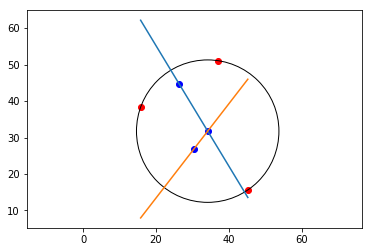

In [ ]:
# отрисовать точки, центры отрезков, перпендикуляры, центр окружности и саму окружность

x = np.linspace(np.append(pts[:,0],[x_c]).min(), np.append(pts[:,0],[x_c]).max(), 100)
plt.scatter(pts[:,0], pts[:,1], color='r')
plt.scatter([c1[0], c2[0], x_c], [c1[1], c2[1], y_c], color='b')
plt.plot(x, k_1*x+b_1)
plt.plot(x, k_2*x+b_2)
circ = plt.Circle((x_c, y_c), r, facecolor='none', edgecolor='k')
ax = plt.gca()
ax.add_artist(circ)
plt.axis('equal')

## Пример 2. Посчитать длину ломаной линии

In [ ]:
line = npr.rand(100, 2)
line.shape

(100, 2)

In [ ]:
d = line[1:] - line[:-1]
d.shape

(99, 2)

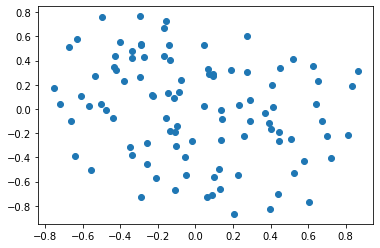

In [ ]:
plt.scatter(d[:,0], d[:,1])

In [ ]:
# вычислить длину
# ...

# (x1, y1), (x2, y2)
# sqrt((x2-x1)**2 + (y2-y1)**2) - длина одного отрезка

## Пример 3. Преобразовать рисунок, наложить маску

In [ ]:
# загрузить изображение из файла
# видно, что изображение имеет разрешение 543x530 точек
# и три слоя - R,G,B

img = plt.imread('Futurama.jpg')
type(img), img.shape

(numpy.ndarray, (543, 530, 3))

In [ ]:
# при помощи этого метода можно посмотреть названия всех имеющихся цветовых шкал

plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

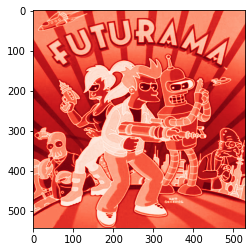

In [ ]:
# отобразить слой R при помощи цветовой шкалы 'Reds'
# r g b 

plt.imshow(img[:,:,0], cmap='Reds')

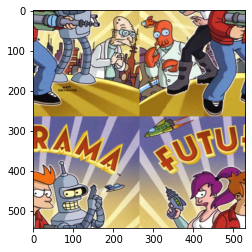

In [ ]:
# циклически сдвинуть изображение на половину ширины
# сохранить результат в новой переменной

img1 = np.roll(img, img.shape[1]//2, axis=0)

img2 = np.roll(img1, img1.shape[1]//2, axis=1)

plt.imshow(img2)

In [ ]:
# создать еще один слой - alpha-слой (слой прозрачности)
# и заполнить его значением 255 (полностью непрозрачный)
# для пикселей в диапазоне 100-200 по обеим осям установить значение alpha = 100

alpha = np.zeros_like(img[:,:,0])+255
alpha[100:200, 100:200]=100

In [ ]:
# в слое R обнулить все пиксели, значение которых больше 100 (слишком красные)

img1[img1[:,:,0]>100,0]=0

In [ ]:
# объединить измененные слои и слой alpha в единый массив из четырех слоев

img1 = np.stack((img1[:,:,0],img1[:,:,1],img1[:,:,2],alpha), axis=2)

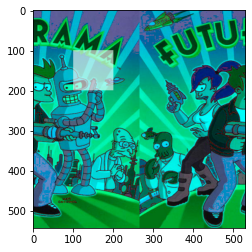

In [ ]:
# отрисовать полученное изображение

plt.imshow(img1)

In [ ]:
# сохранить результирующее изображение в файл

plt.imsave('Futurama_edited.png', img1)

## Вопросы и дополнения


[Scientific Python Lectures](https://github.com/jrjohansson/scientific-python-lectures)

[100 Numpy Exercises](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.ipynb)

Задача. Шахматная доска

### Задание 0. Шахматная доска

Пользуясь только возможностями Numpy сгенерировать матрицу, NxN, в которой в шахматном порядке расположены белые (значение 0) и черные (значение 1) клетки размером MxM (M<N).

Варианты решения (от простого к сложному):
1. M=1
2. N кратно M
3. M < N


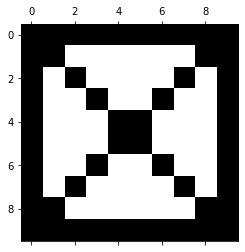

In [ ]:
# Отобразить доску можно при помощи matplotlib:

import matplotlib.pyplot as plt
import numpy as np

board = np.ones((10,10)) #np.zeros(введите размеры)
board[1:-1,1:-1]=0

board += np.diag([1]*10)+np.diag([1]*10)[:, ::-1]

plt.spy(board)
plt.show()

In [ ]:
np.diag([1]*10)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
[1]*10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
board

array([[2., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [2., 1., 1., 1., 1., 1., 1., 1., 1., 2.]])